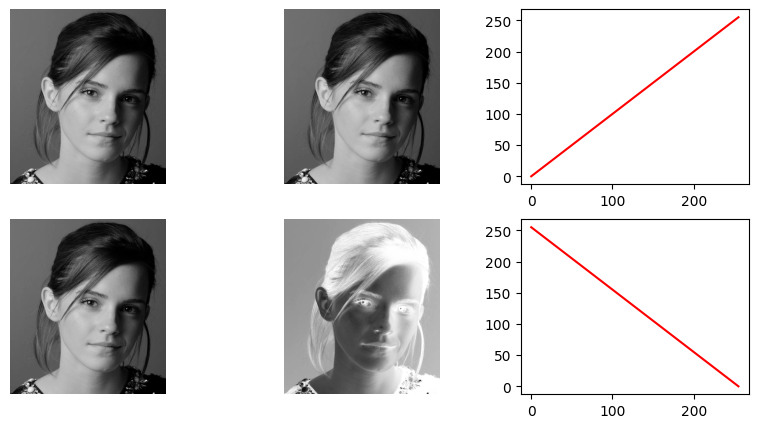

In [3]:
#linear intensity transform

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('Images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.arange(256, dtype=np.uint8)
# negative Transformation
t2 = np.arange(255, -1, -1, dtype=np.uint8) #map intensity of pixel to negative value 0-->255, 0-->255

#alternatively we can use cv.LUT(f,t1)

fig, ax = plt.subplots(2,3,figsize=(10,5))
ax[0,0].imshow(f, cmap='gray')
ax[0,0].xaxis.set_ticks_position('top')
ax[0,0].axis('off')

ax[0,1].imshow(t1[f], cmap='gray')
ax[0,1].xaxis.set_ticks_position('top')
ax[0,1].axis('off')

ax[0,2].plot(t1, 'r', label='Transformation')

ax[1,0].imshow(f, cmap='gray')
ax[1,0].xaxis.set_ticks_position('top')
ax[1,0].axis('off')

ax[1,1].imshow(t2[f], cmap='gray')
ax[1,1].xaxis.set_ticks_position('top')
ax[1,1].axis('off')

ax[1,2].plot(t2, 'r', label='Transformation')

plt.show()

#useful for see tumor cells

256


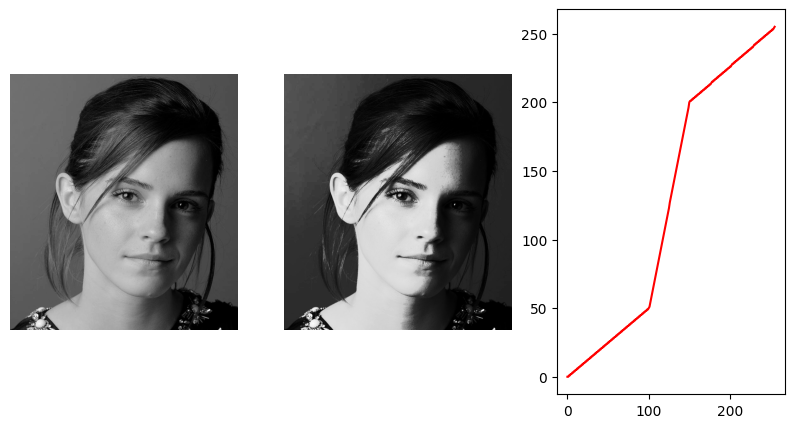

In [25]:
c = np.array([(100, 50), (150, 200)]) #cordinates of breakpoints

# linspace - devide range  of number to specific number of partition
# 0-50 y range devides to 101 parts because every x has to be a y value in the range
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')

# 51-200 y range devides to 150-100 = 50 samples
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')

# 201-255 y range devides to 255-150 = 105 smaples
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

img_orig = cv.imread('Images/emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)

fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].xaxis.set_ticks_position('top')
ax[0].axis('off')

ax[1].imshow(image_transformed, cmap='gray')
ax[1].xaxis.set_ticks_position('top')
ax[1].axis('off')

ax[2].plot(transform, 'r', label='Transformation')


(-0.5, 764.5, 768.5, -0.5)

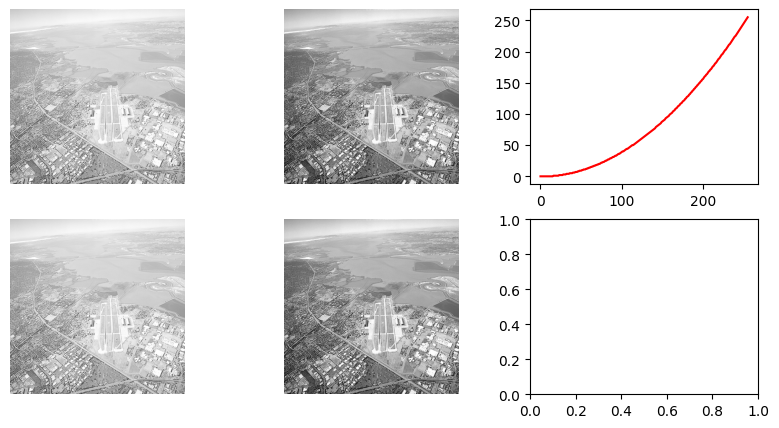

In [6]:


f1 = cv.imread('Images/Fig0309(a)(washed_out_aerial_image).tif', cv.IMREAD_GRAYSCALE)
f2 = cv.imread('Images/Fig0309(a)(washed_out_aerial_image).tif')
assert f1 is not None
assert f2 is not None

gamma = 2

t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)

# i/255 for data type float and map the input range between 0-1, after multiply by 255 to get input range of intensities of an iamge.

g1 = cv.LUT(f1, t)
g2 = cv.LUT(f2, t)

fig, ax = plt.subplots(2,3,figsize=(10,5))
# ax[0][0].imshow(f1)
ax[0][0].imshow(f2, cmap='gray')
ax[0][0].xaxis.set_ticks_position('top')
ax[0][0].axis('off')

ax[0][1].imshow(g)
# ax[1].imshow(g, cmap='gray')
ax[0][1].xaxis.set_ticks_position('top')
ax[0][1].axis('off')

ax[0][2].plot(t, 'r', label='Transformation')

ax[1][0].imshow(f2)
# ax[0].imshow(f2, cmap='gray')
ax[1][0].xaxis.set_ticks_position('top')
ax[1][0].axis('off')

ax[1][1].imshow(g)
# ax[1].imshow(g, cmap='gray')
ax[1][1].xaxis.set_ticks_position('top')
ax[1][1].axis('off')

# gamma high - take narrow range of input bright values show in larger range of bright values
# gamma = 2 enhances the bright areas 

(-0.5, 499.5, 499.5, -0.5)

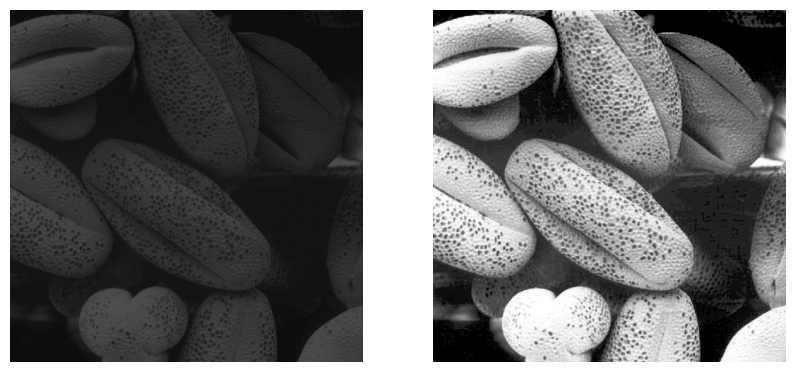

In [28]:
# Histogram Equlization

f = cv.imread('Images/shells.tif', cv.IMREAD_GRAYSCALE)

g = cv.equalizeHist(f)


fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].xaxis.set_ticks_position('top')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].xaxis.set_ticks_position('top')
ax[1].axis('off')

(-0.5, 499.5, 499.5, -0.5)

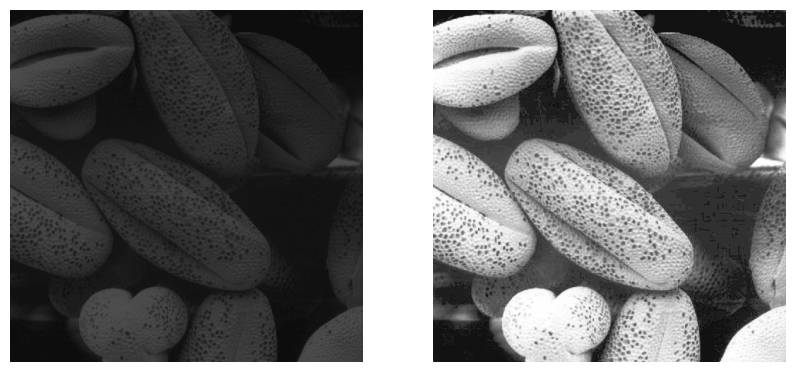

In [29]:
# Histogram equalization using equation

f = cv.imread('Images/shells.tif', cv.IMREAD_GRAYSCALE)

M,N = f.shape
h = cv.calcHist([f], [0], None, [256], [0,256])
cdf = np.cumsum(h)
L= 256
t = np.uint8((L-1)*cdf/(M*N))
g = t[f]


fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].xaxis.set_ticks_position('top')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].xaxis.set_ticks_position('top')
ax[1].axis('off')